# Example use case of the RMMD

This notebook provides a simple use case of the Robust Maximum Mean Discrepancy for testing equality between distributions observed with two nested levels of sampling, based on our paper *"Kernel Hypothesis Testing with Set-valued Data"*.

## What is the Robust Maximum Mean Discrepancy test?

The two-sample problem considers testing whether two independent samples are likely drawn from the same distribution. Conventional tests, however, are often applicable to data that is defined in a fixed-dimensional space. In many applications, units of data however consist of sets of correlated points, which violate the *i.i.d* assumption most tests require. Examples in practice are plentiful, such as time series, different angles of the same image or bags of words to describe text. Crucially, data units such as time series may be irregularly sampled, noisy, and of different length. Direct comparisons are not possible. 

We consider representing each set as independent draws from separate probability distributions that encode the uncertainty within the sets we do observe. Each one of them is assumed sampled in turn by a meta-distribution we are interested in understanding. The problem becomes determining equality in meta-distribution in two collections of a number of sets. We take a two-stage approach to this problem: first mapping empirical distributions into a Reproducing Hilbert kernel space, in which the representation of our data can be directly compared.  

Let us import some necessary packages before illustrating this problem with a simple example.

In [2]:
import matplotlib.pyplot as plt
import data as data
import general_utils
import numpy as np
import data as data
import kernel_utils
import two_sample_test_utils as tst

We start by generating irregularly sampled time series data under the null. We generate 500 time series, each with 10 observations sampled from a sine function perturbed by independent Gaussian noise terms

In [14]:
t1, y1 = data.generate_random_functions(size=500, num_obs = 10, function='sine', variance=0.1)
t2, y2 = data.generate_random_functions(size=500, num_obs = 10, function='sine', variance=0.1)

Lets plot some of these samples.

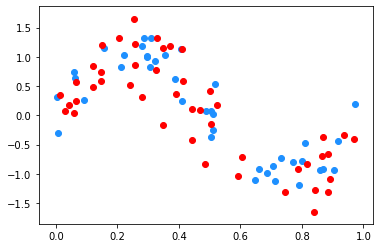

In [12]:
plt.figure()
plt.scatter(t1[0].flatten(), y1[0].flatten(), color='dodgerblue')
plt.scatter(t2[0].flatten(), y2[0].flatten(), color='red')

Our test can be run by simply calling the following function. Three options are available depending onthe desired output: 'full', for a complete output with test statistic values, permutation values, and decision; 'p_value' for the p value only; and, 'stat', for the test statistic. 

In [15]:
tst.RMMD(t1,y1,t2,y2,output='p_value')

0.71